In [2]:
import plotly.express as px
from glob import glob
import os
import pandas as pd
import csv
import numpy as np
import seaborn as sns
from collections import defaultdict
import plotly.graph_objects as go
from matplotlib import pyplot as plt

In [3]:
img_dir = 'images'
os.makedirs(img_dir, exist_ok=True)

# DFIV Results

In [4]:
DUMP_DIR = '../dumps'
dir = 'dfiv_low_dim_original'

In [5]:
def get_results(dir):
    dfs = []
    root = os.path.join(DUMP_DIR, dir)
    for subdir in os.listdir(root):
        if not os.path.isdir(os.path.join(root, subdir)):
            continue

        result = np.load(os.path.join(root, subdir, 'result.npz'))
        mse = list(result['oos_loss'])[:2800]
            
        n = len(mse)
        props = {}
        if ':' in subdir:
            props =  [item.split(':') for item in subdir.split('-')]
            props = {item[0]: [item[1]] for item in props}
            props = {key: val * n for key, val in props.items()}
        props.update({'rmse': np.sqrt(mse), 'dir': [dir] * n})
        dfs.append(pd.DataFrame(props))
    return pd.concat(dfs)

In [51]:
df_parcs =  get_results('dfiv_low_dim_noise_demand_mu')
df_parcs = df_parcs.fillna(0)
# set(df.sigma)
# df_parcs.sigma = ['0' if val == 'None' else val for val in df_parcs.sigma]
df_parcs = df_parcs[df_parcs['rho'] == '0.5']
df_parcs = df_parcs[df_parcs['data_size'] == '10000']
df_parcs['parcs_config'] = df_parcs['parcs_config'].apply(lambda x: 'None' if x == 'None' else x.split('_')[-1])
# df_parcs = df_parcs[['rmse', 'dir']]
# set(df_parcs.sigma)
df_parcs

,data_size,rho,parcs_config,rmse,dir
0,10000,0.5,8,22.783050,dfiv_low_dim_noise_demand_mu
1,10000,0.5,8,19.448071,dfiv_low_dim_noise_demand_mu
2,10000,0.5,8,19.584381,dfiv_low_dim_noise_demand_mu
3,10000,0.5,8,26.383984,dfiv_low_dim_noise_demand_mu
4,10000,0.5,8,20.426969,dfiv_low_dim_noise_demand_mu
0,10000,0.5,2,13.830667,dfiv_low_dim_noise_demand_mu
1,10000,0.5,2,15.430808,dfiv_low_dim_noise_demand_mu
2,10000,0.5,2,14.879340,dfiv_low_dim_noise_demand_mu
3,10000,0.5,2,15.545421,dfiv_low_dim_noise_demand_mu
4,10000,0.5,2,14.289064,dfiv_low_dim_noise_demand_mu


In [52]:
df_orignal = get_results('dfiv_low_dim_original')
# df_orignal['rho'] = '0.5'
df_orignal = df_orignal[df_orignal['rho'] == '0.5']
df_orignal = df_orignal[df_orignal['data_size'] == '10000']
df_orignal

,data_size,rho,rmse,dir
0,10000,0.5,18.132303,dfiv_low_dim_original
1,10000,0.5,15.151604,dfiv_low_dim_original
2,10000,0.5,15.876135,dfiv_low_dim_original
3,10000,0.5,15.062214,dfiv_low_dim_original
4,10000,0.5,11.821062,dfiv_low_dim_original


In [53]:
df_comb = pd.concat([df_parcs, df_orignal])
df_comb
df_comb = df_comb.fillna('0')
# df_comb = df_comb[df_comb['rho'] == '0.5']
# df_comb

In [54]:
df_comb.loc[df_comb['dir'] == 'dfiv_low_dim_original', 'case'] = 'Original'
df_comb.loc[df_comb['dir'] == 'dfiv_low_dim_noise_demand_mu', 'case'] = "Strong HC"
df_comb

,data_size,rho,parcs_config,rmse,dir,case
0,10000,0.5,8,22.783050,dfiv_low_dim_noise_demand_mu,Strong HC
1,10000,0.5,8,19.448071,dfiv_low_dim_noise_demand_mu,Strong HC
2,10000,0.5,8,19.584381,dfiv_low_dim_noise_demand_mu,Strong HC
3,10000,0.5,8,26.383984,dfiv_low_dim_noise_demand_mu,Strong HC
4,10000,0.5,8,20.426969,dfiv_low_dim_noise_demand_mu,Strong HC
0,10000,0.5,2,13.830667,dfiv_low_dim_noise_demand_mu,Strong HC
1,10000,0.5,2,15.430808,dfiv_low_dim_noise_demand_mu,Strong HC
2,10000,0.5,2,14.879340,dfiv_low_dim_noise_demand_mu,Strong HC
3,10000,0.5,2,15.545421,dfiv_low_dim_noise_demand_mu,Strong HC
4,10000,0.5,2,14.289064,dfiv_low_dim_noise_demand_mu,Strong HC


In [55]:
df_avg = df_comb.groupby(['case', 'parcs_config']).mean()
df_avg = df_avg.reset_index()
df_avg = df_avg.fillna(0)
# df_avg = df_avg[df_avg['rho'] == '0.5']
df_avg

,case,parcs_config,rmse
0,Original,0,15.208664
1,Strong HC,2,14.795060
2,Strong HC,4,17.868120
3,Strong HC,8,21.725291


In [56]:
df_std = df_comb.groupby(['case', 'parcs_config'])['rmse'].std()
df_std = df_std.reset_index()
# df_std[df_std['rho'] == '0.5']
df_std

,case,parcs_config,rmse
0,Original,0,2.263500
1,Strong HC,2,0.734916
2,Strong HC,4,2.583584
3,Strong HC,8,2.927334


In [57]:
df_avg['std'] = df_std['rmse']
df_avg

,case,parcs_config,rmse,std
0,Original,0,15.208664,2.263500
1,Strong HC,2,14.795060,0.734916
2,Strong HC,4,17.868120,2.583584
3,Strong HC,8,21.725291,2.927334


In [58]:
# df_comb = df_comb.loc[df_comb['data_size'] != '1000']
df_comb

,data_size,rho,parcs_config,rmse,dir,case
0,10000,0.5,8,22.783050,dfiv_low_dim_noise_demand_mu,Strong HC
1,10000,0.5,8,19.448071,dfiv_low_dim_noise_demand_mu,Strong HC
2,10000,0.5,8,19.584381,dfiv_low_dim_noise_demand_mu,Strong HC
3,10000,0.5,8,26.383984,dfiv_low_dim_noise_demand_mu,Strong HC
4,10000,0.5,8,20.426969,dfiv_low_dim_noise_demand_mu,Strong HC
0,10000,0.5,2,13.830667,dfiv_low_dim_noise_demand_mu,Strong HC
1,10000,0.5,2,15.430808,dfiv_low_dim_noise_demand_mu,Strong HC
2,10000,0.5,2,14.879340,dfiv_low_dim_noise_demand_mu,Strong HC
3,10000,0.5,2,15.545421,dfiv_low_dim_noise_demand_mu,Strong HC
4,10000,0.5,2,14.289064,dfiv_low_dim_noise_demand_mu,Strong HC


In [59]:
fig = px.box(df_comb, x='parcs_config', y='rmse', color = 'case', points='all',
                # facet_col='rho', facet_col_wrap=3,
                log_y=True,
                height = 300, width = 700,
                category_orders = {'sigma': ['0', '0.2', '1', '1.8'],
                                   'data_size': ['1000', '5000', '10000'],
                                   'rho': ['0.1', '0.5', '0.9']},
                labels={
                     "data_size": "N",
                     "mse": "MSE",
                     "case": "Case",
                     'sigma': 'Sigma'
                 })
fig.update_layout(
    font=dict(
        size=30
    ))
fig.update_xaxes()
fig.update_yaxes(dtick=1)
fig.update_traces(width=0.6)
fig.show()
fig.write_image(f"{img_dir}/mean squared error box.pdf")

In [1]:
fig = px.bar(df_avg, x='parcs_config', y='rmse', color = 'case',
                height = 400, width = 700,
                barmode="group",
                category_orders = {'sigma': ['0', '0.2', '1', '1.8'],
                                   'data_size': ['5000', '10000'],
                                   'data_size': ['1000', '5000', '10000'],
                                   'rho': ['0.1', '0.5', '0.9']},
                labels={
                     "data_size": "N",
                     "mse": "MSE",
                     "case": "Case",
                     'sigma': 'Sigma',
                     'parcs_config': 'Noise Demand Mean'
                 })
fig.update_xaxes(type='category')
fig.update_layout(
    font=dict(
        size=25
    )
)
fig.update_traces(width=0.3)
fig.show()
fig.write_image(f"{img_dir}/mean squared error bar hc.pdf")

NameError: name 'px' is not defined

In [72]:
# fig = sns.FacetGrid(df, col = 'rho')
# fig.map_dataframe(sns.boxplot, x='data_size', y='mse', hue='case')
# plt.yscale('log')
# fig.set(yscale="log")
# fig.tight_layout()
# fig.add_legend()

# Draw Nonlinear Curve

In [63]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({
    "figure.figsize": [7.50, 4.50],
    "figure.autolayout": True,
    "text.usetex": False,
    "font.family": "sans-serif",
    'font.size': 16
})

data_size = 1000

In [64]:
import sys
sys.path.append('../')
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

In [65]:
# def psi(t: np.ndarray) -> np.ndarray:
#     return 2 * (((t - 3) ** 3 )/ 500 + np.exp(-6 * ((t-5) ** 2)) - np.sqrt(t) + np.log(25 * (t ** 2) + 5) + np.sin(t)  - 7)

# def f(p: np.ndarray, t: np.ndarray, s: np.ndarray) -> np.ndarray:
#     return 100 + 10 * s * psi(t) - (s * psi(t) - 2) * p**3

def psi(t: np.ndarray) -> np.ndarray:
    return 2 * ((t - 5) ** 4 / 600 + np.exp(-4 * (t - 5) ** 2) + t / 10 - 2)

def f(p: np.ndarray, t: np.ndarray, s: np.ndarray) -> np.ndarray:
    return 100 + (10 + p) * s * psi(t) - 2 * p

In [66]:
t= np.linspace(0.0, 10, 1000)
np.mean(psi(t))

-2.404595746403984

In [67]:
dir = 'dfiv_low_dim_noise_demand_mu'
# subdir = 'one'
subdir = 'data_size:10000-rho:0.5-parcs_config:demand_noise_price_8'
idx = 0

In [68]:
result = np.load(os.path.join(DUMP_DIR, dir, subdir, 'result.npz'))

treatment, covariate, prediction, oos_loss = result['treatment'], result['covariate'], result['prediction'], result['oos_loss']

t = treatment[idx].flatten().tolist()
c = covariate[idx].flatten().tolist()
p = prediction[idx].flatten().tolist()
loss = oos_loss[idx].flatten().tolist()

tt, tc, tp, tloss = t[2800:3800], c[2800:3800], p[2800:3800], loss[2800:3800]
pt, pc, pp, ploss = t[3800:], c[3800:], p[3800:], loss[3800:]

In [69]:
# test data for CATE w.r.t. time with size 1000
t_res = []
dop = [25]  # do(P=25)
t_time= np.linspace(0.0, 10, 1000)
emu = [4] # E[mu] = 4
for p, t, s in product(dop, t_time, emu):
    t_res.append(f(p, t, s))  
    
    
# test data ATE w.r.t. Price with size 1000
p_res = []
p = np.linspace(10, 25, 1000)
tmu = [5] # E[time] = 5
emu = [4] # E[emotion] = 4
for pi, t, s in product(p, tmu, emu):
    p_res.append(f(pi, t, s)) 
    

In [70]:
# tp_parcs = tp
# pp_ori = pp

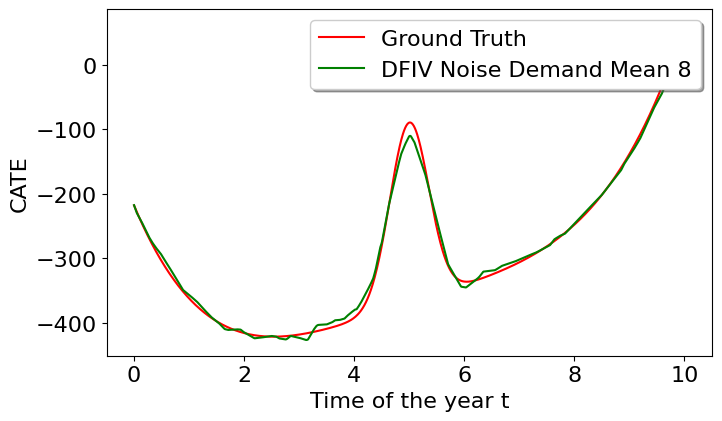

In [72]:
fig, ax = plt.subplots()
l1, = ax.plot(t_time, t_res, color='red', label='Ground Truth')
# l2, = ax.plot(t_time, tp_parcs, color='blue', label='DFIV PARCS')
l3, = ax.plot(t_time, tp, color='green', label='DFIV Noise Demand Mean 8')
ax.legend(handles=(l1, l3), loc='upper right', shadow=True)

ax.set_xlabel('Time of the year t')
ax.set_ylabel('CATE')
plt.savefig(f'{img_dir}/CATE hst2.pdf')
plt.show()

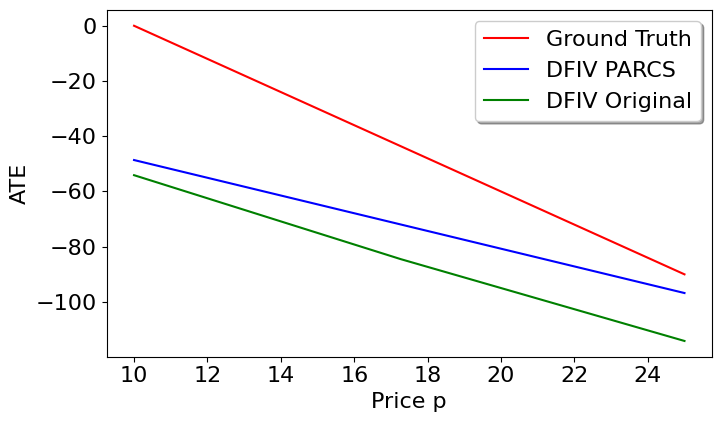

In [29]:
# fig, ax = plt.subplots()
# l1, = ax.plot(p, p_res, color='red', label='Ground Truth')
# l2, = ax.plot(p, pp, color='blue', label='DFIV PARCS')
# l3, = ax.plot(p, pp_ori, color='green', label='DFIV Original')
# # l3, = ax.plot(t_time, tp_parcs, color='green', label='DFIV PARCS')
# ax.legend(handles=(l1, l2, l3), loc='upper right', shadow=True)

# ax.set_xlabel('Price p')
# ax.set_ylabel('ATE')
# plt.savefig(f'{img_dir}/p.pdf')
# plt.show()

In [105]:
def get_results(dir):
    dfs = []
    root = os.path.join(DUMP_DIR, dir)
    for subdir in os.listdir(root):
        if not os.path.isdir(os.path.join(root, subdir)):
            continue

        result = np.load(os.path.join(root, subdir, 'result.npz'))
        mse = list(result['oos_loss'])[:2800]
            
        n = len(mse)
        props = {}
        if ':' in subdir:
            props =  [item.split(':') for item in subdir.split('-')]
            props = {item[0]: [item[1]] for item in props}
            props = {key: val * n for key, val in props.items()}
        props.update({'rmse': np.sqrt(mse), 'dir': [dir] * n})
        dfs.append(pd.DataFrame(props))
    return pd.concat(dfs)

# DFIV vs SpaceIV

In [113]:
case = 'case_iv_num_8'
spaceiv_dir = '../../spaceIV'

In [114]:
cases = [case]
res_dir = os.path.join(spaceiv_dir, 'results/comp/')
dfs = {case: pd.read_csv(os.path.join(res_dir, f'{case}.csv')) for case in cases}
df_sparseiv = dfs[case]
df_sparseiv['model'] = 'spaceIV'

In [115]:
def read_ys(data_dir, case):
    ys = []
    for dir in os.listdir(os.path.join(data_dir, case)):
        if all(item in dir for item in ['a1', 'a2', 'a3']):
            dir = os.path.join(data_dir, case, dir)
            data_file = os.path.join(dir, 'data_size1600.csv')
            df = pd.read_csv(data_file)
            y = df['y_0'].to_numpy()
            ys.append(y)
        else:
            print(f'neglected foler {dir}')
    return np.hstack(ys)

In [116]:
data_dir = os.path.join(spaceiv_dir, 'data')
ys = read_ys(data_dir, case)
print(f'{ys.mean()}', ys.std())

0.0305897964245619 4.095392608446486


In [117]:
# spaceIV_data_root = '../../spaceIV/data/'
# spaceIV_data_dir = os.path.join(spaceIV_data_root, case)
# print(spaceIV_data_dir)
# assert os.path.exists(spaceIV_data_dir), 'no such data'

In [118]:
df_dfiv =  get_results('dfiv_spaceiv_div_8')
df_dfiv['model'] = 'DFIV'
if 'case' in df_dfiv.columns:
    df_dfiv = df_dfiv[df_dfiv['case'] == case]
df_dfiv

,rmse,dir,model
0,2.371942,dfiv_spaceiv_div_8,DFIV
1,2.730804,dfiv_spaceiv_div_8,DFIV
2,2.657409,dfiv_spaceiv_div_8,DFIV
3,2.884911,dfiv_spaceiv_div_8,DFIV
4,3.887382,dfiv_spaceiv_div_8,DFIV


In [119]:
df_merge = pd.concat([df_sparseiv,df_dfiv], axis=0)
# df_merge

In [120]:
df_merge.groupby('model')['rmse'].mean()

model
DFIV        2.906489
spaceIV    49.925948
Name: rmse, dtype: float64

In [121]:
df_merge.groupby('model')['rmse'].std()

model
DFIV         0.579065
spaceIV    172.384107
Name: rmse, dtype: float64

In [ ]:
fig = px.box(df_merge, x='model', y='mse', log_y=True,
             points="all",
             height = 400, width = 800,
             labels={
                     "mode": "Algorithm",
                     "mse": "Mean Squared Error",
                 })
fig.update_layout(
    font=dict(
        size=18
    )
)
fig.show()
fig.write_image(f"{img_dir}/{case}.pdf")

# Viz Demand Dataset

In [5]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({
    "figure.figsize": [7.50, 3.50],
    "figure.autolayout": True,
    "text.usetex": False,
    "font.family": "sans-serif",
    'font.size': 16
})

data_size = 1000

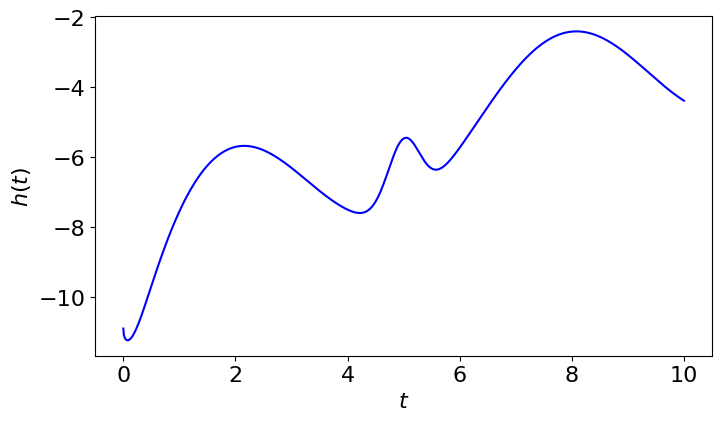

In [163]:
t = np.linspace(0, 10, data_size)

plt.plot(t, psi(t), color='blue')
plt.xlabel('$t$')
plt.ylabel('$h(t)$')
plt.savefig(f'{img_dir}/time_function.pdf')
plt.show()

In [2]:
min_t = 2.53379
min_psi_t = psi(min_t)
print(f'min psi(t): {min_psi_t}')
z = 3
min_p = 25 + min_psi_t * (z + 3) -3
print(f'min p: {min_p}')

max_t = 10
max_psi_t = psi(max_t)
print(f'max psi(t): {max_psi_t}')
z = 3
max_p = 25 + max_psi_t * (z + 3) + 3
print(f'max p: {max_p}')

NameError: name 'psi' is not defined

In [ ]:
rng = np.random.default_rng(seed=0)
rho = 0.5
emotion = rng.choice(list(range(1, 8)), data_size)
time = rng.uniform(0, 10, data_size)
cost = rng.normal(0, 1.0, data_size)
noise_price = rng.normal(0, 1.0, data_size)
noise_demand = rho * noise_price + rng.normal(0, np.sqrt(1 - rho ** 2), data_size)
price = 25 + (cost + 3) * psi(time) + noise_price
structural: np.ndarray = f(price, time, emotion).astype(float)
outcome: np.ndarray = (structural + noise_demand).astype(float)
price_scale = (price - min_p) / (max_p - min_p)
sigmas = [0.2, 1, 1.8]
hetero_noise_demand = [rho * noise_price + rng.normal(0, price_scale * sigma, data_size) for sigma in sigmas]

In [ ]:
# fig = px.scatter(x=price, y=noise_demand, width=800, height=400)
# fig.update_traces(marker_size=10)
# fig.show()

In [ ]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(rows=2, cols=2, subplot_titles=(r'$\text{Demand Variance} = 1-\rho^2$ = 0.75$',
#                                                     r'$\text{Demand Variance} = r(p) * 0.2$', 
#                                                     r'$\text{Demand Variance} = r(p)$', 
#                                                     r'$\text{Demand Variance} = $r(p) * 1.8$'))

# fig.add_trace(go.Scatter(x=price, y=noise_demand, mode="markers", marker=dict(color='blue', size=10)), row=1, col=1)

# fig.add_trace(go.Scatter(x=price, y=hetero_noise_demand[0], mode="markers", marker=dict(color='blue', size=10)), row=1, col=2)

# fig.add_trace(go.Scatter(x=price, y=hetero_noise_demand[1], mode="markers", marker=dict(color='blue', size=10)), row=2, col=1)

# fig.add_trace(go.Scatter(x=price, y=hetero_noise_demand[2], mode="markers", marker=dict(color='blue', size=10)), row=2, col=2)

# fig.update_layout(height=800, width=1200, title_text="", showlegend=False)

# fig.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

axs[0, 0].scatter(price, noise_demand)
axs[0, 0].set_title(r'Demand Variance = $1-\rho ^2 = 0.75$')
axs[0, 0].set_ylabel('The Noise of Demand')
axs[0, 0].set_xlabel('Price')

axs[0, 1].scatter(price, hetero_noise_demand[0])
axs[0, 1].set_title(r'Demand Variance = $r(p) * 0.2$')
axs[0, 1].set_ylabel('The Noise of Demand')
axs[0, 1].set_xlabel('Price')

axs[1, 0].scatter(price, hetero_noise_demand[1])
axs[1, 0].set_title(r'Demand Variance = $r(p)$')
axs[1, 0].set_ylabel('The Noise of Demand')
axs[1, 0].set_xlabel('Price')

axs[1, 1].scatter(price, hetero_noise_demand[2])
axs[1, 1].set_title(r'Demand Variance = $r(p) * 1.8$')
axs[1, 1].set_ylabel('The Noise of Demand')
axs[1, 1].set_xlabel('Price')

fig.savefig(f'{img_dir}/demand_noise.pdf')